In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.models import Model
from keras.layers import Input, Dense, Activation
from keras.utils import np_utils

Using Theano backend.


In [2]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
dataset = read_csv('../datasets/mnist_data/train.csv').values

In [3]:
X_train, X_test, y_train, y_test = train_test_split(dataset[:, 1:], dataset[:, 0], test_size=0.2)
X_train, X_test = X_train/255, X_test/255

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(33600, 784) (8400, 784) (33600,) (8400,)


In [38]:
inp = Input(shape=(784,))
fc1 = Dense(2, activation='relu')(inp)
out = Dense(784, activation='relu')(fc1)
autoencoder = Model(inputs=inp, outputs=out)
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1570      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               2352      
Total params: 3,922
Trainable params: 3,922
Non-trainable params: 0
_________________________________________________________________


In [39]:
autoencoder.compile(loss='mse', optimizer='adadelta', metrics=['accuracy'])

In [40]:
hist = autoencoder.fit(X_train, X_train, epochs=10, shuffle=True, batch_size=128, validation_data=(X_test, X_test))

Train on 33600 samples, validate on 8400 samples
Epoch 1/10
33600/33600 [==============================] - 1s 22us/step - loss: 0.0871 - acc: 0.0073 - val_loss: 0.0833 - val_acc: 0.0093
Epoch 2/10
33600/33600 [==============================] - 1s 22us/step - loss: 0.0833 - acc: 0.0072 - val_loss: 0.0821 - val_acc: 0.0082
Epoch 3/10
33600/33600 [==============================] - 1s 23us/step - loss: 0.0803 - acc: 0.0107 - val_loss: 0.0781 - val_acc: 0.0080
Epoch 4/10
33600/33600 [==============================] - 1s 28us/step - loss: 0.0772 - acc: 0.0076 - val_loss: 0.0762 - val_acc: 0.0093
Epoch 5/10
33600/33600 [==============================] - 1s 24us/step - loss: 0.0751 - acc: 0.0102 - val_loss: 0.0744 - val_acc: 0.0102
Epoch 6/10
33600/33600 [==============================] - 1s 24us/step - loss: 0.0743 - acc: 0.0105 - val_loss: 0.0741 - val_acc: 0.0105
Epoch 7/10
33600/33600 [==============================] - 1s 24us/step - loss: 0.0737 - acc: 0.0104 - val_loss: 0.0734 - val_acc:

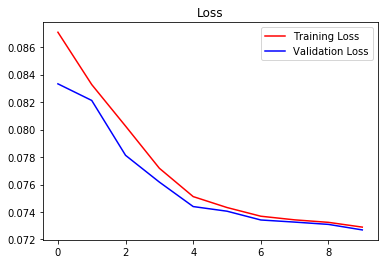

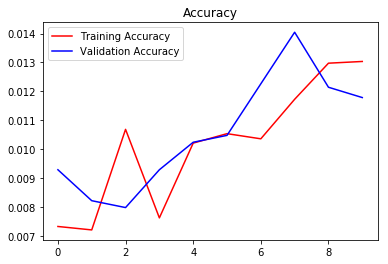

In [41]:
plt.figure(0)
plt.title("Loss")
plt.plot(hist.history['loss'], 'r', label='Training Loss')
plt.plot(hist.history['val_loss'], 'b', label='Validation Loss')
plt.legend()
plt.show()

plt.figure(1)
plt.title("Accuracy")
plt.plot(hist.history['acc'], 'r', label='Training Accuracy')
plt.plot(hist.history['val_acc'], 'b', label='Validation Accuracy')
plt.legend()
plt.show()

In [42]:
autoencoder.layers

In [43]:
encoder = Model(inputs=inp, outputs=fc1)
encoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 2)                 1570      
Total params: 1,570
Trainable params: 1,570
Non-trainable params: 0
_________________________________________________________________


In [44]:
dec_inp = Input(shape=(2,))
x = autoencoder.layers[-1](dec_inp)
decoder = Model(inputs=dec_inp, outputs=x)

<br><br><hr>

# Regeneration

In [45]:
preds = encoder.predict(X_train)
preds.shape

(33600, 2)

In [46]:
out = decoder.predict(preds)

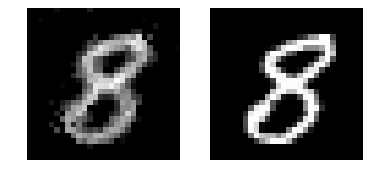

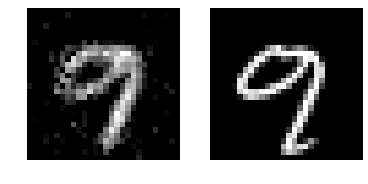

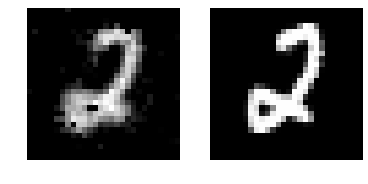

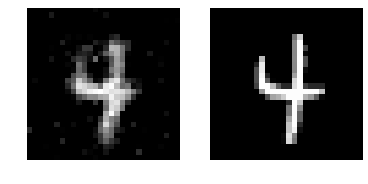

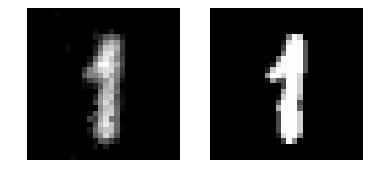

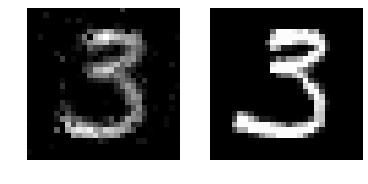

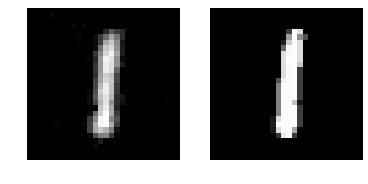

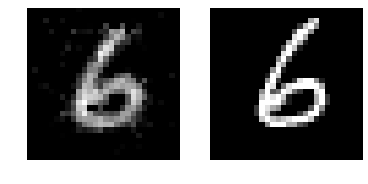

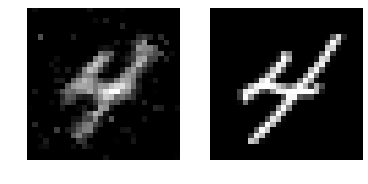

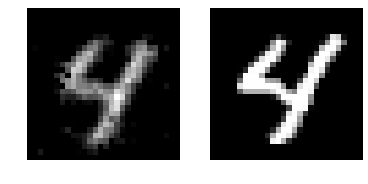

In [37]:
for i in range(10):
    plt.figure()
    plt.subplot(1,2,1)
    plt.axis("off")
    plt.imshow(out[i].reshape(28,28), cmap='gray')
    plt.subplot(1,2,2)
    plt.axis("off")
    plt.imshow(X_train[i].reshape(28,28), cmap='gray')

<br><br><hr>

# PCA vs AE

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

X_sk = pca.fit_transform(X_train[:10000])
X_sk.shape



(10000, 2)

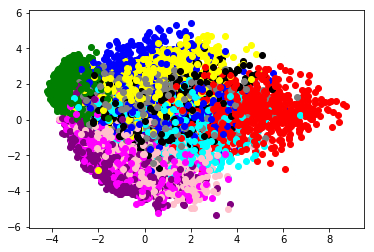

In [14]:
colors = ['red', 'green', 'blue', 'yellow', 'pink', 'black', 'cyan', 'purple', 'gray', 'magenta']

plt.figure()
for i in range(10000):
    plt.scatter(X_sk[i,0], X_sk[i,1], color=colors[y_train[i]])
plt.show()

In [45]:
preds = 255 * preds

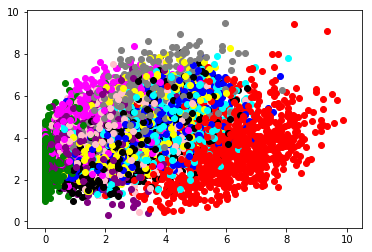

In [47]:
plt.figure()

for i in range(10000):
    plt.scatter(preds[i,0], preds[i,1], color=colors[y_train[i]])
plt.show()